<a href="https://colab.research.google.com/github/arezyhs/Interpolasi-Lagrange/blob/main/Lagrange_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Studi Kasus: Prediksi Emisi CO₂ dengan Interpolasi Lagrange

Studi kasus ini mengeksplorasi penggunaan **Interpolasi Lagrange** untuk memprediksi emisi CO₂ berdasarkan konsumsi listrik dari bahan bakar fosil. Kita akan menggunakan pendekatan interpolasi hingga orde tertentu, yang dapat diatur sesuai keinginan, untuk memprediksi dan mengevaluasi akurasi model pada berbagai orde.

## 📌 Langkah-Langkah Implementasi

### 1️⃣ Data Input
Dataset yang digunakan adalah:
- `electricity_data`: Data konsumsi listrik dari bahan bakar fosil dalam satuan TWh.
- `co2_emission_data`: Data emisi CO₂ terkait dalam satuan kiloton (kt).

### 2️⃣ Fungsi Pembentukan Polinomial Lagrange
Fungsi `lagrange_polynomial` membentuk polinomial Lagrange **simbolik** menggunakan **SymPy** berdasarkan data yang diberikan. Polinomial ini membantu menghitung turunan untuk memperkirakan batas error Lagrange.

### 3️⃣ Interpolasi Lagrange
Fungsi `lagrange_interpolation` digunakan untuk menghitung nilai interpolasi pada titik target tertentu (`x_target`) untuk berbagai orde. Polinomial interpolasi dihitung dari data yang paling mendekati titik target untuk mencapai akurasi yang lebih baik.

### 4️⃣ Batas Error Lagrange Teoritis
- Batas error Lagrange dihitung dengan **turunan ke-(n+1)** dari polinomial interpolasi.
- Turunan ini dievaluasi untuk menemukan **nilai maksimum** dalam rentang data yang tersedia. Nilai maksimum ini digunakan untuk memperkirakan error maksimum dalam setiap orde interpolasi.
- Fungsi `lagrange_error_bound` menerapkan formula Lagrange error bound untuk menghitung batas error teoretis.

### 5️⃣ Evaluasi Error Numerik
Error dievaluasi pada titik tambahan (titik yang tidak termasuk dalam data asli). Untuk setiap orde, kita menghitung error numerik berikut:
- **Mean Absolute Error (MAE)**: Rata-rata selisih absolut antara nilai prediksi dan nilai aktual.
- **Mean Absolute Percentage Error (MAPE)**: Rata-rata persentase error antara nilai prediksi dan nilai aktual.
- **Mean Squared Error (MSE)**: Rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual.
- **Root Mean Squared Error (RMSE)**: Akar kuadrat dari MSE, menunjukkan error rata-rata dalam satuan asli data.

### 6️⃣ Plotting
Grafik interpolasi dihasilkan untuk setiap orde hingga `max_order` yang diatur, beserta titik prediksi pada `x_target`. Grafik ini memvisualisasikan bagaimana model interpolasi mendekati data asli untuk setiap orde.

## 🔧 Parameter yang Dapat Diatur
- **`x_target`**: Titik prediksi (misal: 238.91).
- **`max_order`**: Batas maksimum orde interpolasi yang ingin dihitung (misal: hingga orde 4).
  
Anda dapat mengatur `max_order` untuk menentukan hingga orde berapa interpolasi akan dilakukan dan dievaluasi.

## 📈 Hasil dan Output

### 📊 Hasil Prediksi, Batas Error Lagrange, dan Evaluasi Error
Untuk setiap orde dari 1 hingga `max_order`, hasil prediksi, batas error teoritis, dan evaluasi error pada titik tambahan ditampilkan. Ini membantu dalam membandingkan akurasi antar orde dan memahami seberapa baik setiap orde interpolasi dalam mendekati data asli.

### 📉 Grafik Interpolasi
Grafik interpolasi menunjukkan:
- **Kurva interpolasi untuk setiap orde** dari 1 hingga `max_order`.
- **Titik prediksi pada `x_target`** untuk setiap orde, dengan label hasil prediksi.
- **Titik data asli** dan **titik tambahan untuk evaluasi error** untuk visualisasi yang lebih lengkap.

---

## 📂 Referensi Fungsi Utama
- **`lagrange_polynomial(x_values, y_values)`**: Membentuk polinomial Lagrange secara simbolis.
- **`lagrange_interpolation(x_values, y_values, x_target, order)`**: Menghitung nilai interpolasi untuk titik target dengan orde tertentu.
- **`lagrange_error_bound(x_values, x_target, order)`**: Menghitung batas error Lagrange teoritis berdasarkan turunan ke-(n+1) dan produk dari perbedaan titik data.

---

## 📌 Kesimpulan Studi Kasus
Studi ini menunjukkan bahwa **Interpolasi Lagrange dapat memberikan prediksi yang akurat pada rentang data** yang ada. Namun, perlu diperhatikan:
- **Interpolasi Orde Tinggi**: Memberikan akurasi yang lebih baik pada data asli namun cenderung menghasilkan batas error teoritis yang sangat tinggi. Hal ini terjadi karena hasil kali dari perbedaan titik data serta nilai maksimum turunan ke-(n+1) yang besar.
- **Evaluasi Error Numerik**: Menunjukkan error aktual yang biasanya lebih kecil dibandingkan batas error teoritis. Evaluasi ini memberikan gambaran yang lebih praktis mengenai akurasi model.
- **Pemilihan Orde**: Interpolasi orde lebih rendah sering kali lebih stabil dan cukup akurat untuk data dalam rentang terbatas.
---

**Author:** Arezyhs


Hasil Prediksi, Batas Error Lagrange, dan Evaluasi Error untuk X = 238.91 dengan Berbagai Orde:

Orde 1:
  Prediksi = 589508.78
  Batas Error Lagrange = 0.00
  Mean Absolute Error (MAE) pada titik tambahan = 4374.77
  Mean Absolute Percentage Error (MAPE) pada titik tambahan = 0.94%
  Mean Squared Error (MSE) pada titik tambahan = 36483763.58
  Root Mean Squared Error (RMSE) pada titik tambahan = 6040.18
  Persamaan Polinomial Lagrange:
3576.79772120201⋅x - 265023.961348167

--------------------------------------------------

Orde 2:
  Prediksi = 590822.94
  Batas Error Lagrange = 0.00
  Mean Absolute Error (MAE) pada titik tambahan = 2944.98
  Mean Absolute Percentage Error (MAPE) pada titik tambahan = 0.64%
  Mean Squared Error (MSE) pada titik tambahan = 14676153.31
  Root Mean Squared Error (RMSE) pada titik tambahan = 3830.95
  Persamaan Polinomial Lagrange:
                    2                                        
- 44.2776266984652⋅x  + 24954.0358912209⋅x - 2843667.92279571

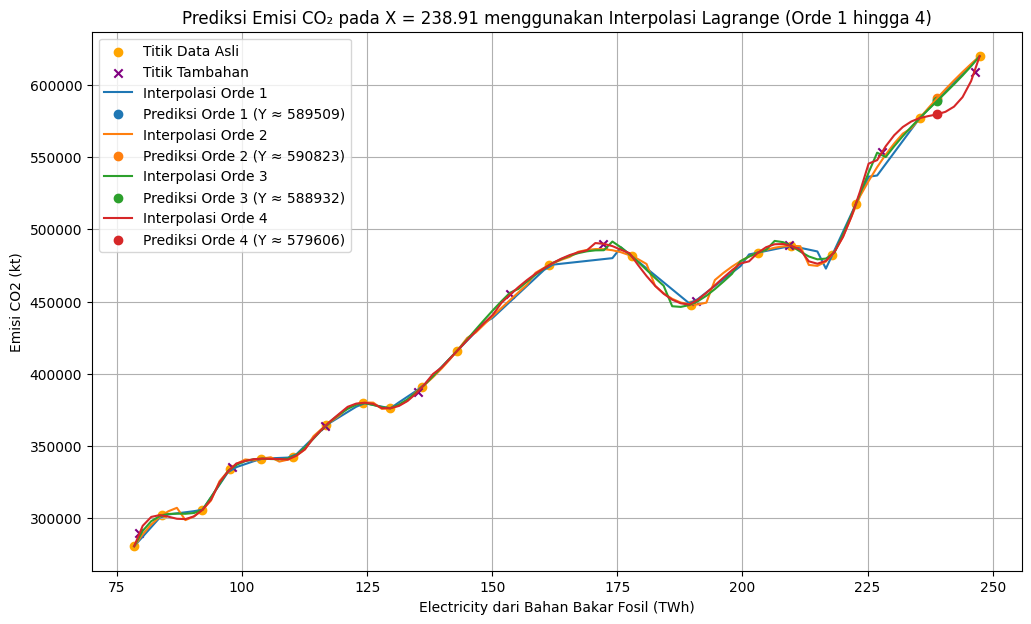

In [51]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

# Data untuk Electricity (TWh) dan CO2 Emission (Metrics Ton per Capita)
electricity_data = np.array([78.43, 83.96, 92.03, 97.57, 103.8, 110.22, 116.8, 124.1, 129.55, 136.05,
                             142.88, 161.41, 177.83, 189.66, 203.11, 209.71, 217.97, 222.64, 235.41, 247.39])

co2_emission_data = np.array([280650, 302060, 305640.0146, 333890.0146, 341239.9902, 342149.9939, 364470.0012,
                              379959.9915, 376140.0146, 391079.9866, 415519.989, 475309.9976, 481510.0098, 447940.0024,
                              483910.0037, 488549.9878, 482510.0098, 517320.0073, 576989.9902, 619840.0269])

# Membuat variabel simbolik untuk x
x = sp.symbols('x')

# Fungsi untuk membentuk polinomial Lagrange simbolik menggunakan SymPy berdasarkan titik terdekat
def lagrange_polynomial(x_values, y_values):
    n = len(x_values)
    polynomial = 0
    for i in range(n):
        term = y_values[i]
        for j in range(n):
            if i != j:
                term *= (x - x_values[j]) / (x_values[i] - x_values[j])
        polynomial += term
    return sp.simplify(polynomial)

# Fungsi interpolasi polinomial Lagrange
def lagrange_interpolation(x_values, y_values, x_target, order):
    # Pilih titik-titik terdekat sejumlah order + 1
    idx = np.argsort(np.abs(x_values - x_target))[:order + 1]
    x_selected = x_values[idx]
    y_selected = y_values[idx]

    # Membentuk polinomial Lagrange untuk titik terpilih
    lagrange_poly = lagrange_polynomial(x_selected, y_selected)
    # Evaluasi polinomial Lagrange pada x_target
    interpolated_value = sp.lambdify(x, lagrange_poly, 'numpy')(x_target)
    return interpolated_value, lagrange_poly

# Fungsi untuk menghitung batas error Lagrange menggunakan formula teoritis
def lagrange_error_bound(x_values, x_target, order):
    # Pilih titik-titik terdekat sejumlah order + 1
    idx = np.argsort(np.abs(x_values - x_target))[:order + 1]
    x_selected = x_values[idx]
    # Membentuk polinomial Lagrange untuk titik terpilih
    lagrange_poly = lagrange_polynomial(x_selected, co2_emission_data[idx])
    # Menghitung turunan ke-(order+1) dari polinomial
    nth_derivative = sp.diff(lagrange_poly, x, order + 1)
    # Menghitung nilai maksimum turunan di interval [min(x_selected), max(x_selected)]
    max_derivative_value = sp.lambdify(x, nth_derivative, 'numpy')
    x_vals = np.linspace(min(x_selected), max(x_selected), 100)
    max_derivative = np.max(np.abs(max_derivative_value(x_vals)))
    # Menghitung produk dari (x_target - x_i) untuk semua i pada titik terpilih
    product_term = np.prod([x_target - x_selected[i] for i in range(order + 1)])
    # Menggunakan formula Lagrange error
    error_estimate = np.abs(max_derivative * product_term) / math.factorial(order + 1)
    return error_estimate

# Menentukan hingga orde berapa interpolasi dilakukan
max_order = 4  # atur orde

# Nilai x target untuk prediksi
x_target = 238.91 # atur nilai x prediksi

# Melakukan interpolasi Lagrange untuk x_target hingga max_order
higher_order_predictions = {}
lagrange_polynomials = {}

for order in range(1, max_order + 1):
    prediction, poly = lagrange_interpolation(electricity_data, co2_emission_data, x_target, order)
    higher_order_predictions[order] = prediction
    lagrange_polynomials[order] = poly  # Menyimpan bentuk persamaan polinomial untuk setiap orde

# Menghitung batas error Lagrange untuk setiap orde
error_bounds = {order: lagrange_error_bound(electricity_data, x_target, order) for order in range(1, max_order + 1)}

# Titik-titik tambahan untuk pengujian di luar titik data asli
test_points = np.linspace(min(electricity_data) + 1, max(electricity_data) - 1, 10)
actual_values_test = [lagrange_interpolation(electricity_data, co2_emission_data, x, max_order)[0] for x in test_points]

# Evaluasi error pada titik tambahan untuk setiap orde interpolasi
errors_mae_test = {}
errors_mape_test = {}
errors_mse_test = {}
errors_rmse_test = {}

for order in range(1, max_order + 1):
    # Menghitung nilai interpolasi untuk setiap titik uji pada setiap orde
    y_interp_test = np.array([lagrange_interpolation(electricity_data, co2_emission_data, x, order)[0] for x in test_points])
    y_actual_test = np.array(actual_values_test)

    # Mean Absolute Error (MAE)
    errors_mae_test[order] = np.mean(np.abs(y_interp_test - y_actual_test))
    # Mean Absolute Percentage Error (MAPE)
    errors_mape_test[order] = np.mean(np.abs((y_interp_test - y_actual_test) / y_actual_test)) * 100
    # Mean Squared Error (MSE)
    errors_mse_test[order] = np.mean((y_interp_test - y_actual_test) ** 2)
    # Root Mean Squared Error (RMSE)
    errors_rmse_test[order] = np.sqrt(errors_mse_test[order])

# Menampilkan hasil prediksi, batas error Lagrange, dan evaluasi error numerik pada titik tambahan
print("\nHasil Prediksi, Batas Error Lagrange, dan Evaluasi Error untuk X = 238.91 dengan Berbagai Orde:")
for order in range(1, max_order + 1):
    print(f"\nOrde {order}:")
    print(f"  Prediksi = {higher_order_predictions[order]:.2f}")
    print(f"  Batas Error Lagrange = {error_bounds[order]:.2f}")
    print(f"  Mean Absolute Error (MAE) pada titik tambahan = {errors_mae_test[order]:.2f}")
    print(f"  Mean Absolute Percentage Error (MAPE) pada titik tambahan = {errors_mape_test[order]:.2f}%")
    print(f"  Mean Squared Error (MSE) pada titik tambahan = {errors_mse_test[order]:.2f}")
    print(f"  Root Mean Squared Error (RMSE) pada titik tambahan = {errors_rmse_test[order]:.2f}")
    print("  Persamaan Polinomial Lagrange:")
    sp.pprint(lagrange_polynomials[order])
    print("\n" + "-"*50)

# Plotting
plt.figure(figsize=(12, 7))
plt.scatter(electricity_data, co2_emission_data, color='orange', label='Titik Data Asli')
plt.scatter(test_points, actual_values_test, color='purple', marker='x', label='Titik Tambahan')
x_range = np.linspace(min(electricity_data), max(electricity_data), 100)

# Menghitung dan menampilkan nilai interpolasi untuk setiap orde hingga max_order
for order in range(1, max_order + 1):
    y_interp = [lagrange_interpolation(electricity_data, co2_emission_data, x, order)[0] for x in x_range]
    plt.plot(x_range, y_interp, label=f'Interpolasi Orde {order}')
    plt.scatter(x_target, higher_order_predictions[order], label=f'Prediksi Orde {order} (Y ≈ {higher_order_predictions[order]:.0f})')

plt.xlabel('Electricity dari Bahan Bakar Fosil (TWh)')
plt.ylabel('Emisi CO2 (kt)')
plt.title(f'Prediksi Emisi CO₂ pada X = 238.91 menggunakan Interpolasi Lagrange (Orde 1 hingga {max_order})')
plt.legend()
plt.grid(True)
plt.show()
